## **03. 언어 모델(Language Model)**
언어 모델(Language Model)이란 단어 시퀀스(문장)에 확률을 할당하는 모델을 말한다.<br>
이번 챕터에서는 통계에 기반한 전통적인 언어 모델(Statistical Language Model, SLM)에 관해 학습한다.


### **03-01 언어 모델(Language Model)이란?**
언어 모델이란 단어 시퀀스(문장)에 확률을 할당하는 모델이다.<br>
언어 모델을 만드는 방법은 통계를 이용한 방법과 인공 신경망을 이용한 방법이 있다.<br>
최근에는 인공 신경망을 활용한 방식이 좀 더 좋은 성능을 보여주고 있다.(GPT, BERT)

#### ***1. 언어 모델(Language Model)***
<U>단어 시퀀스에 확률을 할당하기 위해서 사용되는 방법</U><br>
a) 이전 단어들이 주어졌을 떄 다음 단어를 예측하는 방법<br>
b) 주어진 양쪽의 단어들로부터 가운데 비어있는 단어를 예측하는 방법


<U>언어 모델링</U>: 주어진 단어들로부터 아직 모르는 단어를 예측하는 작업 

#### ***2. 단어 시퀀스의 확률 할당***
a. 기계 번역(Machine Translation):<br>
P(나는 버스를 탔다) > P(나는 버스를 태운다)

b. 오타 교정(Spell Correction):<br>
P(달려갔다) > P(잘려갔다)  [선생님이 교실로 부리나케 - ]

c. 음성 인식(Speech Recognition):<br>
P(나는 메롱을 먹는다) > P(나는 메론을 먹는다)

#### ***3. 주어진 이전 단어들로부터 다음 단어 예측하기***
<U>**A. 단어 시퀀스(문장)의 확률**</U><br>
W = 문장, w = 하나의 단어<br>
$P(W) = P(w_1, w_2, w_3, w_4, ..., w_n)$

<U>**B. 다음 단어 등장 확률**</U><br>
$P(W) = P(w_1, w_2, w_3, w_4, ..., w_n)$ $=$ $\prod_{i=1}^nP(w_i ㅣ w_1, ...,w_{i-1})$



#### ***4. 언어 모델의 간단한 직관***
앞에 나온 단어들을 기반으로 뒤에 나올 단어들을 예측하는 것

### **03-02 통계적 언어 모델(Statistical Language Model, SLM)**


#### ***1. 조건부 확률***
n개의 조건부 확률에 관한 연쇄 법칙:<br>
$P(x_1, x_2, x_3, ..., x_n) = P(x_1)P(x_2|x_1)P(x_3|x_1,x_2)...P(x_n|x_1,...,x_{n-1})$

#### ***2. 문장에 관한 확률***
문장 'An adorable little boy is spreading smiles'의 확률을 식으로 표현해보자.

$P(An\,adorable\,little\,boy\,is\,spreading\,smiles) =$ <br>
$P(An) \times P(adorable|An) \times P(boy|An\,adorable\,little) \times P(is|An\,adorable\,little\,boy) \times P(spreading|An\,adorable\,little\,boy\,is) \times P(smiles|An\,adorable\,little\,boy\,is\,spreading)$

#### ***3.카운트 기반의 접근***
그렇다면, An adorable little boy라는 문장이 나왔을 떄, is 가 나올 확률은 어떻게 구할 수 있을까?<br>
$P(is|An\,adorable\,little\,boy) = \cfrac{count(An\,adorable\,little\,boy\,is)}{count(An\,adorable\,little\,boy)}$

#### ***4. 카운트 기반 접근의 한계 - 희소 문제(Sparsity Problem)***
카운트 기반으로 현실에서의 확률 분포를 근사하기 위해선 방대한 양의 데이터가 필요하다.<br>
만약 분모 or 분자에 들어갈 데이터가 존재하지 않는다면 확률값은 $\infty$, 0이 되고 이는 올바른 값이 아니다.<br>
이 문제를 희소 문제(sparsity problem)이라고 한다.<br>
이 문제를 완화하는 방법으로는 n-gram 언어 모델, 스무딩, 백오프와 같은 여러가지 일반화 기법이 존재한다.<br>
하지만 희소 문제의 근본적인 해결책은 되지 못해서, 통계적 언어 모델에서 인공 신경망 언어 모델로 넘어가게 된다.

### **03-03 N-gram 언어 모델(N-gram Language Model)**
n-gram은 카운트에 기반한 통계적 접근을 사용하고 있다. -> 여전히 SLM<br>
다만, 앞서 배운 언어 모델과 달리 이전에 등장한 모든 단어가 아닌 n개의 단어만을 고려한다.

#### ***1. 코퍼스에서 카운트하지 못하는 경우의 감소.***
$P(is|An\,adorable\,little\,boy) \approx P(is|boy)$<br>
지나친 일반화라고 생각한다면,

$P(is|An\,adorable\,little\,boy) \approx P(is|little\,boy)$

이런 식으로 한다면, 카운트할 확률이 높아진다(문장이 나올 확률이 높아진다는 말이 아님)

#### ***2. N-gram***
n-gram은 n개의 연속적인 단어 나열을 의미한다.<br>
n=1(unigram), n=2(bigram), n=3(trigram), n=4(4-gram) ...

Ex) 'An adorable little boy is spreading' 뒤에 나올 단어를 4-gram 을 이용해 예측하는 경우 -> 'boy is spreading'만을 고려한다.<br>
$P(w|boy\,is\,spreading) =  \cfrac{count(boy\,is\,spreading\,w)}{count(boy\,is\,spreading)} $



#### ***3. N-gram Language Model의 한계***
쉽게 생각해낼 수 있는 것 : 전체의 문맥을 반영할 수 없다.

<U>1). 희소 문제(Sparsity Problem)</U><br>
일반적인 카운트 기반의 접근보단 코퍼스를 카운트 할 수 있지만. 여전히 희소 문제가 존재한다.

<U>2). n을 선택하는 것은 trade-off 문제</U><br>
N-gram에서 n의 값이 커진다면 정확도는 높아지겠지만 희소 문제가 심각해질 것.


#### ***4. 적용 분야(Domain)에 맞는 코퍼스의 수집***
어떤 분야인지, 어떤 어플리케이션인지에 따라 특정 단어들의 단어 분포가 다르고 이는 학습 데이터에도 영향을 준다.

#### ***5. 인공 신경망을 이용한 언어 모델(Neural Network Based Language Model)***
고질적인 N-gram의 문제점을 최근 인공 신경망을 이용한 언어 모델을 사용해 해결하고 있다.

### **03-04 한국어에서의 언어 모델(Language Model for Korean Sentences)**



#### ***1. 한국어는 어순이 중요하지 않다.***
#### ***2. 한국어는 교착어이다.***
교착어 : 어근에 접사가 결합하여 의미가 변화하는 형태의 언어 (조사)
#### ***3. 한국어는 띄어쓰기가 제대로 지켜지지 않는다.***


### **03-05 펄플렉서티(Perplexity, PPL)**
다양한 모델에 관해 각 모델들의 성능을 비교하고자 할 때, 시간적인 문제를 해결한 평가 방법

#### ***1. 언어 모델의 평가 방법(Evaluation metric) : PPL***
PPL: 헷갈리는 정도
문장의 길이로 정규화된 문장 확률의 역수.

$ PPL(W) = P(w_1,w_2,...,w_N)^{-1 \over N}$ = 
$ \sqrt[\leftroot{10} \uproot{15} N] {\cfrac {1}{P(w_1,w_2,...,w_{i-1})}} $

$ PPL(W) = \sqrt[\leftroot{10} \uproot{15} N] {\cfrac {1}{\prod_{i=1}^nP(w_i ㅣ w_1, ...,w_{i-1})}}$

bigram 언어 모델의 경우

$ PPL(W) = \sqrt[\leftroot{10} \uproot{15} N] {\cfrac {1}{\prod_{i=1}^nP(w_iㅣw_{i-1})}}$

#### ***2. 분기 계수(Branching factor)***
PPL은 선택할 수 있는 가능한 경우의 수를 의미하는 분기계수다.<br>
EX) PPL=10, 해당 모델은 다음 단어를 예측하는 시점마다 평균적으로 10개의 단어를 후보에 둔다.

#### ***3. 기존 언어 모델 VS 인공 신경망을 이용한 언어 모델***
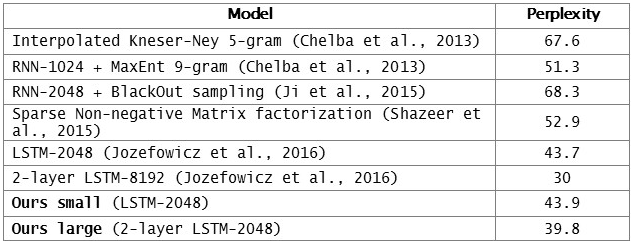


### **03-06 조건부 확률(Conditional Probability)**
skip

## **04. 카운트 기반의 단어 표현(Count based word Representation)**
정보 검색과 텍스트 마이닝 분야에 주로 사용되는<br>
카운트 기반의 텍스트 표현 방법 DTM(Document Term Matrix), TF-IDF(Term Frequency-Inverse Document Frequency)

### **04-01 다양한 단어의 표현 방법**



#### ***1. 단어의 표현 방법***
크게 국소 표현(Local Representation)방법과 분산 표현(Distributed Representation)방법으로 나뉨<br>
국소 표현 방법은 단어의 의미. 뉘앙스를 표현할 수 없지만, 분산 표현 방법은 단어의 뉘앙스를 표현할 수 있다.


#### ***2. 단어 표현의 카테고리화***
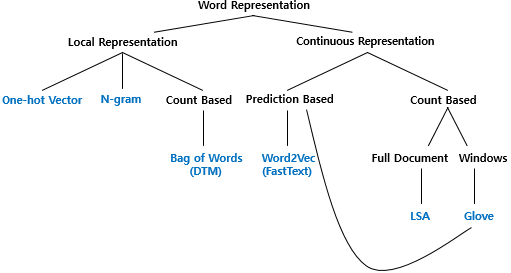

### **04-02 Bag of Words(BoW)**
단어의 등장 순서는 고려하지 않고 빈도를 기반으로 표현


#### ***1. Bag of Words란?***
코퍼스에 단어의 출현 빈도에만 집중하는 텍스트 데이터의 수치화 표현 방법.

In [ ]:
%pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 465 kB 58.8 MB/s 


In [ ]:
import konlpy
from konlpy.tag import Okt

okt = Okt()

def build_bag_of_words(document):
  # 온점 제거 및 형태소 분석
  document = document.replace('.', '')
  tokenized_document = okt.morphs(document)

  word_to_index = {}
  bow = []

  for word in tokenized_document:  
    if word not in word_to_index.keys():
      word_to_index[word] = len(word_to_index)  
      # BoW에 전부 기본값 1을 넣는다.
      bow.insert(len(word_to_index) - 1, 1)
    else:
      # 재등장하는 단어의 인덱스
      index = word_to_index.get(word)
      # 재등장한 단어는 해당하는 인덱스의 위치에 1을 더한다.
      bow[index] = bow[index] + 1

  return word_to_index, bow

In [ ]:
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab, bow = build_bag_of_words(doc1)
print('vocabulary :', vocab)
print('bag of words vector :', bow) # 인덱스에 해당하는 단어가 출현한 빈도가 값으로 표현됨.

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


#### ***2. Bag of Words의 다른 예제들***
주로 어떤 단어가 얼마나 등장했는지를 나타내기에 문서가 어떤 성격의 문서인지를 판단하는 작업에 쓰인다.<br>
여러 문서 간의 유사도를 구하는 문제에 주로 쓰인다.

In [ ]:
doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'

vocab, bow = build_bag_of_words(doc2)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector : [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


In [ ]:
doc3 = doc1 + ' ' + doc2
vocab, bow = build_bag_of_words(doc3)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector : [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


#### ***3. CountVectorizer 클래스로 BoW 만들기***
주의 : sklearn의 CountVetorizer는 2이상인 문자에 관해서 토큰화, 띄어쓰기를 기준으로 토큰화.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray()) 

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :',vector.vocabulary_)

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


#### ***4. 불용어를 제거한 BoW 만들기***
텍스트 내에서 불용어를 제거하면 단어 처리의 정확도를 높일 수 있다.

In [ ]:
# 1). 사용자가 직접 정의한 불용어 사용
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


In [ ]:
# 2). CountVectorizer에서 제공하는 자체 불용어 사용
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1]]
vocabulary : {'family': 0, 'important': 1, 'thing': 2}


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# 3). NLTK에서 지원하는 불용어 사용
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words("english")
vect = CountVectorizer(stop_words=stop_words)
print('bag of words vector :',vect.fit_transform(text).toarray()) 
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


### **04-03 문서 단어 행렬(Document-Term Matrix, DTM)**
서로 다른 문서들의 BoW들을 결합한 표현 방법인 DTM. 행과 열을 반대로 선택하면 TDM이 된다.

#### ***1. 문서 단어 행렬(Document-Term Matrix, DTM)의 표기법***
여러가지 문서에 관해, 각 문서에 등장한 단어의 빈도를 행렬의 값으로 표기.
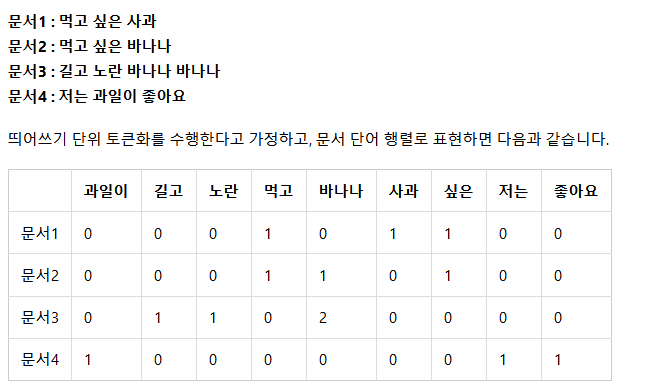

#### ***2. 문서 단어 행렬(Document-Term Matrix)의 한계***
<U> 1) 회소 표현(Sparse representation)</U><br>
행렬 내부의 원-핫 벡터는 공간적 낭비와 계산 리소스를 증가시킨다.<br>
원-핫 벡터나 DTM같이 대부분의 값이 0인 것들을 희소 벡터(sparse vector), 희소 행렬(sparse matrix)라고 한다.
<br>

<U> 2) 단순 빈도 수 기반 접근</U><br>
큰 의미가 없는 단어가 빈도수가 높은 경우 문제가 된다.<br>
-> 불용어와 중요한 단어에 대해서 가중치를 주는 방안

### **04-04 TF-IDF(Term Frequency-Inverse Document Frequency)**
TF-IDF가 DTM보다 항상 좋은 성능을 보장하진 않지만, 많은 경우 DTM보다 더 좋은 성능을 얻을 수 있다.

#### ***1. TF-IDF(단어 빈도-역 문서 빈도, Term Frequency-Inverse Document Frequency)***
단어의 빈도와 역 문서 빈도를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법.<br>
TF-IDF는 TF와 IDF를 곱한 값을 의미한다.<br>
문서:d, 단어:t, 문서의 총 개수:n


<U>1) tf(d,t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수</U>

<U>2) df(t) : 특정 단어 t가 등장한 문서의 수</U>

<U>3) idf(d,t) : df(t)에 반비례하는 수</U><br>
불용어와 같이 자주 등장하는 단어에 관해선 낮은 값을 부여하기 위함.


#### ***2. 파이썬으로 TF-IDF 직접 구현하기***

In [ ]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
vocab

['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']

In [ ]:
# 총 문서의 수
N = len(docs) 

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(1+df))

def tfidf(t, d):
  return tf(t,d)* idf(t)

In [ ]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_ # DTM

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [ ]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [ ]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


#### ***3. 사이킷런을 이용한 DTM과 TF-IDF 실습***

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus).toarray())

# 각 단어와 맵핑된 인덱스 출력
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# 기존에 학습한 TF-IDF와 sklearn에서 제공하는 TfidVectorizer는 내부는 다르지만 그 의미와 의도는 같다.
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


## **05. 벡터의 유사도(Vector Similarity)**
기계가 계산하는 문서의 유사도의 성능은 모델뿐만 아니라 어떤 방법으로 수치화하는지도 영향을 미친다.(유클리드 거리, 코사인 유사도 등)

### **05-01 코사인 유사도(Cosine Similarity)**
두 벡터의 방향의 유사도<br>

#### ***1. 코사인 유사도(Cosine Similarity)***
$ similarity = cos(\theta) = \cfrac {A \cdot B}{||A|| \space ||B||}$

문서의 길이에 영향받지 않는다.

In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

print('문서 1과 문서2의 유사도 :',cos_sim(doc1, doc2))
print('문서 1과 문서3의 유사도 :',cos_sim(doc1, doc3))
print('문서 2와 문서3의 유사도 :',cos_sim(doc2, doc3))

문서 1과 문서2의 유사도 : 0.6666666666666667
문서 1과 문서3의 유사도 : 0.6666666666666667
문서 2와 문서3의 유사도 : 1.0000000000000002


#### ***2. 유사도를 이용한 추천 시스템 구현하기***

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd drive/MyDrive/딥 러닝을 이용한 자연어 처리 입문

/content/drive/MyDrive/딥 러닝을 이용한 자연어 처리 입문


In [ ]:
!ls

 movies_metadata.csv  '문장 확률.png'   Week1.ipynb   workflow.png
 정규.png	       train.csv        Week2.ipynb


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('movies_metadata.csv', low_memory=False)
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [ ]:
# 상위 2만개의 샘플을 data에 저장
data = data.head(20000)

In [ ]:
# overview 열에 존재하는 모든 결측값을 전부 카운트하여 출력
print('overview 열의 결측값의 수:',data['overview'].isnull().sum())

overview 열의 결측값의 수: 0


In [ ]:
data['overview'] = data['overview'].fillna('') # 결측값을 공백으로 채움.

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['overview'])
print('TF-IDF 행렬의 크기(shape) :',tfidf_matrix.shape)

TF-IDF 행렬의 크기(shape) : (20000, 47487)


In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print('코사인 유사도 연산 결과 :',cosine_sim.shape)

코사인 유사도 연산 결과 : (20000, 20000)


In [ ]:
title_to_index = dict(zip(data['title'], data.index))

# 영화 제목 Father of the Bride Part II의 인덱스를 리턴
idx = title_to_index['Father of the Bride Part II']
print(idx)

4


In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # 선택한 영화의 타이틀로부터 해당 영화의 인덱스를 받아온다.
    idx = title_to_index[title]

    # 해당 영화와 모든 영화와의 유사도를 가져온다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬한다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아온다. 0번째는 자기 자신.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 얻는다.
    movie_indices = [idx[0] for idx in sim_scores]

    # 가장 유사한 10개의 영화의 제목을 리턴한다.
    return data['title'].iloc[movie_indices]

In [ ]:
get_recommendations('The Dark Knight Rises')

12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object

### **05-02 여러가지 유사도 기법**
 

#### ***1. 유클리드 거리(Euclidean distance)***
다차원 공간에서의 두 점 p,q사이의 거리:<br>
$ \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 +...+ (q_n-p_n)^2} $ = $ \sqrt{\Sigma_{i=1}^{n} (q_i - p_i)^2} $

In [ ]:
import numpy as np

def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

doc1 = np.array((2,3,0,1))
doc2 = np.array((1,2,3,1))
doc3 = np.array((2,1,2,2))
docQ = np.array((1,1,0,1))

print('문서1과 문서Q의 거리 :',dist(doc1,docQ))
print('문서2과 문서Q의 거리 :',dist(doc2,docQ))
print('문서3과 문서Q의 거리 :',dist(doc3,docQ))

문서1과 문서Q의 거리 : 2.23606797749979
문서2과 문서Q의 거리 : 3.1622776601683795
문서3과 문서Q의 거리 : 2.449489742783178


#### ***2. 자카드 유사도(Jaccard similarity)***
$ J(A,B) =  \cfrac{|A \cap B|}{|A \cup B|} = \cfrac{|A \cap B|}{|A| + |B|- |A \cap B|}$

0~1사이의 값.

In [ ]:
doc1 = "apple banana everyone like likey watch card holder"
doc2 = "apple banana coupon passport love you"

# 토큰화
tokenized_doc1 = doc1.split()
tokenized_doc2 = doc2.split()

print('문서1 :',tokenized_doc1)
print('문서2 :',tokenized_doc2)

문서1 : ['apple', 'banana', 'everyone', 'like', 'likey', 'watch', 'card', 'holder']
문서2 : ['apple', 'banana', 'coupon', 'passport', 'love', 'you']


In [ ]:
union = set(tokenized_doc1).union(set(tokenized_doc2))
print('문서1과 문서2의 합집합 :',union)

문서1과 문서2의 합집합 : {'likey', 'card', 'love', 'like', 'everyone', 'you', 'coupon', 'apple', 'passport', 'holder', 'watch', 'banana'}


In [ ]:
intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
print('문서1과 문서2의 교집합 :',intersection)

문서1과 문서2의 교집합 : {'apple', 'banana'}


In [ ]:
print('자카드 유사도 :',len(intersection)/len(union))

자카드 유사도 : 0.16666666666666666
